In [1]:
# import
import pandas as pd 
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [8]:
# load the data
data_ML = pd.read_csv('../data/data_ML.csv', index_col=[0])
zod_sign = pd.read_csv('../data/zod_sign.csv', index_col=[0])
data_ML

,Zod_sign_man,Zod_sign_woman,zod_combo,Compatibility_rate,Compatibility
0,Sagittarius,Leo,SagittariusLeo,0.93,Good_fit
2,Pisces,Aries,PiscesAries,0.67,Bad_fit
4,Scorpio,Libra,ScorpioLibra,0.35,Bad_fit
5,Aries,Gemini,AriesGemini,0.83,Good_fit
6,Sagittarius,Aries,SagittariusAries,0.93,Good_fit
...,...,...,...,...,...
4918,Scorpio,Sagittarius,ScorpioSagittarius,0.28,Bad_fit
4919,Libra,Virgo,LibraVirgo,0.68,Bad_fit
4920,Scorpio,Aquarius,ScorpioAquarius,0.73,Good_fit
4921,Cancer,Aquarius,CancerAquarius,0.27,Bad_fit


In [37]:
# do one-hot encoding to Zod_sign_man and Zod_sign_woman and combine them together into a dataframe as X
X_men = pd.get_dummies(data_ML['Zod_sign_man']).values
X_women = pd.get_dummies(data_ML['Zod_sign_woman']).values
X = pd.DataFrame(X_men + X_women)

# define y variable 
y = data_ML.Compatibility

# Rename the columns to zodiac sign
adjacency_matrix = pd.crosstab(data_ML.Zod_sign_man, data_ML.Zod_sign_woman)
idx = adjacency_matrix.columns.union(adjacency_matrix.index)
X.columns = idx

# Rearranging index to start from 1
X.index = np.arange(1, len(X) + 1)

# avoid the multi-line formatting
pd.set_option('expand_frame_repr', False)

print(X)




      Aquarius  Aries  Cancer  Capricorn  Gemini  Leo  Libra  Pisces  Sagittarius  Scorpio  Taurus  Virgo
1            0      0       0          0       0    1      0       0            1        0       0      0
2            0      1       0          0       0    0      0       1            0        0       0      0
3            0      0       0          0       0    0      1       0            0        1       0      0
4            0      1       0          0       1    0      0       0            0        0       0      0
5            0      1       0          0       0    0      0       0            1        0       0      0
...        ...    ...     ...        ...     ...  ...    ...     ...          ...      ...     ...    ...
4370         0      0       0          0       0    0      0       0            1        1       0      0
4371         0      0       0          0       0    0      1       0            0        0       0      1
4372         1      0       0          0      

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(knn.score(X_test, y_test))

1.0


In [13]:
# test train split #
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(knn.score(X_test, y_test))

1.0


In [11]:
# this is cross_val_score #
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(scores)

[1. 1. 1. 1. 1.]


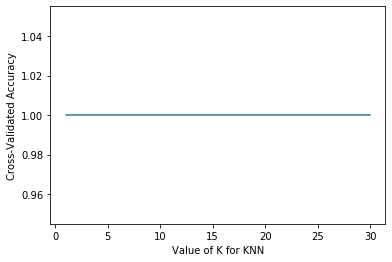

In [7]:
# Use cross_val_score to choose model and configs #
import matplotlib.pyplot as plt
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()